# Text Classification con AutoKeras

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import autokeras as ak
import tensorflow as tf
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)
np.random.seed(5)

#### Modelo 1: Texto Limpio

In [10]:
df = pd.read_csv("../datasets/df_final.csv", sep=";")
df['texto_limpio'].head()

0          AFR PLAN OBRAS EQUIPAMIENTOS SERVICIOS 2022
1                       312 FONDO EROGACIÓN PLAN OBRAS
2    AFR PLAN OBRAS EQUIPAMIENTO SERVICIOS 2022 RUR...
3    DCTO 119 AFR PGO HAB ASIG FLIAR ENE CTA 200982014
4    DCTO 120 AFR PGO HAB ASIG FLIAR ENE CTA 200981813
Name: texto_limpio, dtype: object

In [3]:
# Asegúrate de tener las versiones más recientes
print(f"AutoKeras version: {ak.__version__}")
print(f"TensorFlow version: {tf.__version__}")

df = pd.read_csv("../datasets/df_final.csv", sep=";")
df['texto_limpio'] = df['texto_limpio'].fillna("RES")

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['texto_limpio'], df['target'], test_size=0.2, random_state=42)

# Convertir las series de pandas a arrays de NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Crear el clasificador de texto de AutoKeras
clf = ak.TextClassifier(
    max_trials=4,  # Número de modelos a probar
    overwrite=True
    #max_tokens=20000  # Ajusta este valor según la longitud de tu texto
)

# Ajustar el modelo
clf.fit(X_train, y_train, epochs=10)

# Evaluar el modelo
accuracy = clf.evaluate(X_test, y_test)
print(f"Precisión del modelo: {accuracy[1]}")

# Obtener el mejor modelo
best_model = clf.export_model()

# Guardar el modelo
best_model.save("mi_mejor_modelo_autokeras")

Trial 4 Complete [00h 00m 01s]

Best val_loss So Far: 0.24450507760047913
Total elapsed time: 00h 30m 14s
Epoch 1/10
1160/1160 [==============================] - 169s 145ms/step - loss: 0.8278 - accuracy: 0.7679
Epoch 2/10
1160/1160 [==============================] - 167s 144ms/step - loss: 0.2317 - accuracy: 0.9304
Epoch 3/10
1160/1160 [==============================] - 168s 145ms/step - loss: 0.1576 - accuracy: 0.9500
Epoch 4/10
1160/1160 [==============================] - 165s 142ms/step - loss: 0.1201 - accuracy: 0.9611
Epoch 5/10
1160/1160 [==============================] - 166s 143ms/step - loss: 0.0981 - accuracy: 0.9675
Epoch 6/10
1160/1160 [==============================] - 166s 143ms/step - loss: 0.0811 - accuracy: 0.9726
Epoch 7/10
1160/1160 [==============================] - 169s 146ms/step - loss: 0.0707 - accuracy: 0.9764
Epoch 8/10
1160/1160 [==============================] - 167s 144ms/step - loss: 0.0655 - accuracy: 0.9775
Epoch 9/10
1160/1160 [========================

INFO:tensorflow:Assets written to: .\text_classifier\best_model\assets


290/290 [==============================] - 12s 40ms/step - loss: 0.3242 - accuracy: 0.9361
Precisión del modelo: 0.9360578060150146
INFO:tensorflow:Assets written to: mi_mejor_modelo_autokeras\assets


INFO:tensorflow:Assets written to: mi_mejor_modelo_autokeras\assets


Capas del modelo

In [4]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

Levantamos el modelo

In [13]:
loaded = tf.keras.models.load_model("mi_mejor_modelo_autokeras", custom_objects=ak.CUSTOM_OBJECTS)

loaded.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

#### Modelo 2: Descripción sin procesar

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import autokeras as ak
import tensorflow as tf

# Asegúrate de tener las versiones más recientes
print(f"AutoKeras version: {ak.__version__}")
print(f"TensorFlow version: {tf.__version__}")

df = pd.read_csv("../datasets/df.csv", sep=";",  encoding='latin1')
df['Descripcion'] = df['Descripcion'].fillna("RES")

Class = list(df.Class.unique())
clases = {val:Class.index(val) for val in Class}
def get_class(val):
    return clases[val]
df['target'] = df['Class'].apply(get_class)
df.drop(columns=['Class'], axis=1, inplace=True)



# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['Descripcion'], df['target'], test_size=0.2, random_state=42)

# Convertir las series de pandas a arrays de NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Crear el clasificador de texto de AutoKeras
clf = ak.TextClassifier(
    max_trials=4,  # Número de modelos a probar
    overwrite=True
    #max_tokens=20000  # Ajusta este valor según la longitud de tu texto
)

# Ajustar el modelo
clf.fit(X_train, y_train, epochs=10)

# Evaluar el modelo
accuracy = clf.evaluate(X_test, y_test)
print(f"Precisión del modelo: {accuracy[1]}")

# Obtener el mejor modelo
best_model = clf.export_model()

# Guardar el modelo
best_model.save("autokeras_text_mining")

Trial 4 Complete [00h 00m 01s]

Best val_loss So Far: 0.5009853839874268
Total elapsed time: 00h 34m 10s
Epoch 1/10
1160/1160 [==============================] - 170s 145ms/step - loss: 1.1302 - accuracy: 0.6885
Epoch 2/10
1160/1160 [==============================] - 163s 140ms/step - loss: 0.5388 - accuracy: 0.8452
Epoch 3/10
1160/1160 [==============================] - 163s 140ms/step - loss: 0.4463 - accuracy: 0.8653
Epoch 4/10
1160/1160 [==============================] - 165s 142ms/step - loss: 0.4016 - accuracy: 0.8766
Epoch 5/10
1160/1160 [==============================] - 184s 159ms/step - loss: 0.3745 - accuracy: 0.8831
Epoch 6/10
1160/1160 [==============================] - 191s 165ms/step - loss: 0.3564 - accuracy: 0.8893
Epoch 7/10
1160/1160 [==============================] - 171s 147ms/step - loss: 0.3413 - accuracy: 0.8922
Epoch 8/10
1160/1160 [==============================] - 170s 147ms/step - loss: 0.3283 - accuracy: 0.8957
Epoch 9/10
1160/1160 [=========================

INFO:tensorflow:Assets written to: .\text_classifier\best_model\assets


290/290 [==============================] - 12s 38ms/step - loss: 0.5140 - accuracy: 0.8614
Precisión del modelo: 0.8614405989646912
INFO:tensorflow:Assets written to: autokeras_text_mining\assets


INFO:tensorflow:Assets written to: autokeras_text_mining\assets


#### Modelo 3: Texto limpio sin palabras repetidas

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import autokeras as ak
import tensorflow as tf
import re

# Asegúrate de tener las versiones más recientes
print(f"AutoKeras version: {ak.__version__}")
print(f"TensorFlow version: {tf.__version__}")

df = pd.read_csv("../datasets/df_final.csv", sep=";")
df['texto_limpio'] = df['texto_limpio'].fillna("2023")

def eliminar_palabras(texto):
    texto = texto.upper()
    texto = re.findall(r"(?!CTA)(?!RES)(?!PAGO)(?!AGO)(?!PAG)[A-Z0-9]{3,}", texto)
    texto = list(dict.fromkeys(texto))
    texto = " ".join(texto).strip()
    return texto


df["texto_limpio"] = df["texto_limpio"].apply(eliminar_palabras)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['texto_limpio'], df['target'], test_size=0.2, random_state=42)

# Convertir las series de pandas a arrays de NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Crear el clasificador de texto de AutoKeras
clf = ak.TextClassifier(
    max_trials=4,  # Número de modelos a probar
    overwrite=True
    #max_tokens=20000  # Ajusta este valor según la longitud de tu texto
)

# Ajustar el modelo
clf.fit(X_train, y_train, epochs=10)

# Evaluar el modelo
accuracy = clf.evaluate(X_test, y_test)
print(f"Precisión del modelo: {accuracy[1]}")

# Obtener el mejor modelo
best_model = clf.export_model()

# Guardar el modelo
best_model.save("autokeras_modelo_3")

Trial 4 Complete [00h 00m 01s]

Best val_loss So Far: 0.25200486183166504
Total elapsed time: 00h 29m 18s
Epoch 1/10
1160/1160 [==============================] - 165s 141ms/step - loss: 0.8702 - accuracy: 0.7531
Epoch 2/10
1160/1160 [==============================] - 171s 148ms/step - loss: 0.2534 - accuracy: 0.9252
Epoch 3/10
1160/1160 [==============================] - 192s 166ms/step - loss: 0.1681 - accuracy: 0.9484
Epoch 4/10
1160/1160 [==============================] - 192s 166ms/step - loss: 0.1277 - accuracy: 0.9589
Epoch 5/10
1160/1160 [==============================] - 189s 163ms/step - loss: 0.1066 - accuracy: 0.9651
Epoch 6/10
1160/1160 [==============================] - 196s 169ms/step - loss: 0.0866 - accuracy: 0.9700
Epoch 7/10
1160/1160 [==============================] - 224s 193ms/step - loss: 0.0775 - accuracy: 0.9734
Epoch 8/10
1160/1160 [==============================] - 207s 178ms/step - loss: 0.0721 - accuracy: 0.9749
Epoch 9/10
1160/1160 [========================

INFO:tensorflow:Assets written to: .\text_classifier\best_model\assets


290/290 [==============================] - 12s 39ms/step - loss: 0.3303 - accuracy: 0.9321
Precisión del modelo: 0.9320681691169739
INFO:tensorflow:Assets written to: autokeras_modelo_3\assets


INFO:tensorflow:Assets written to: autokeras_modelo_3\assets


### Accuracy de los modelos Autokeras

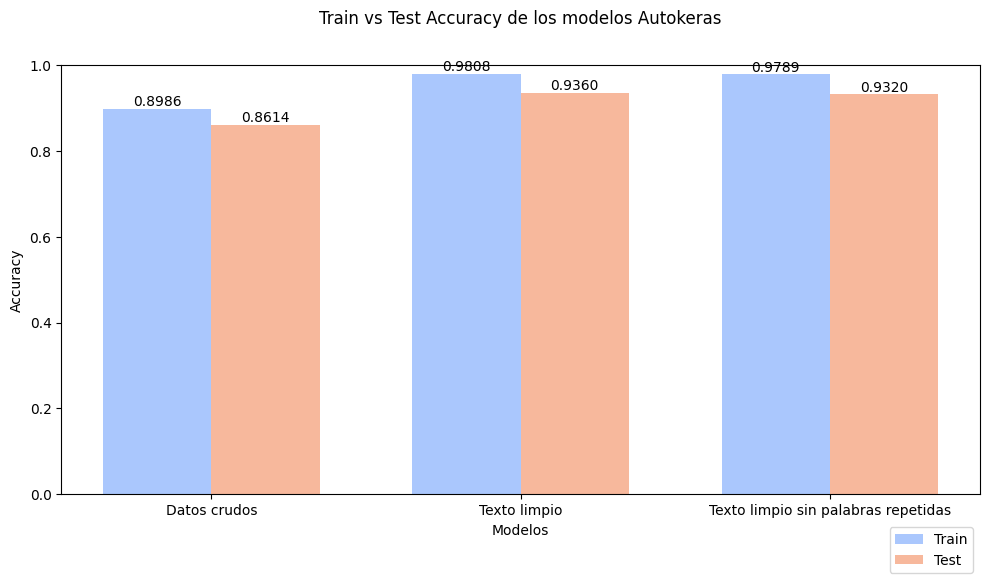

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configurar una paleta de colores
palette = sns.color_palette("coolwarm", 2)

# Datos
labels = ["Datos crudos", "Texto limpio", "Texto limpio sin palabras repetidas"]
values_train = [0.8986, 0.9808, 0.9789]  # Precisión en el conjunto de entrenamiento
values_test = [0.8614, 0.9360, 0.9320]   # Precisión en el conjunto de prueba

# Crear la posición para cada barra
x = np.arange(len(labels))  # Posiciones de las etiquetas
width = 0.35  # El ancho de las barras

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar las barras para el conjunto de entrenamiento y prueba
bars_train = plt.bar(x - width/2, values_train, width, label='Train', color=palette[0])
bars_test = plt.bar(x + width/2, values_test, width, label='Test', color=palette[1])

# Añadir los valores en las barras
for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom', rotation=0)

for bar in bars_test:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom', rotation=0)

# Añadir etiquetas y título
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy de los modelos Autokeras', pad=30)  # Espacio entre el título y las barras
plt.xticks(x, labels)
plt.ylim(0, 1)

# Añadir leyenda en la parte inferior derecha
plt.legend(loc='lower right', bbox_to_anchor=(1, -0.2))

# Mostrar el gráfico
plt.tight_layout()  # Ajustar diseño para evitar solapamientos
plt.show()

